## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize

## Import data obtained from crystal plasticity model

In [2]:
# Uncomment the lines below only if you have data from crystal plasticity model.
# If you don't, let it be. The script is self-sufficient.

# sigma_xxyy = pd.read_csv('dataset/sigma_x-sigma_y.csv', sep=',', names=['sxx', 'syy'])
# sxx = sigma_xxyy['sxx']
# syy = sigma_xxyy['syy']

## YLD2000 equation

In [3]:
def yld2000(sigma_x, sigma_y, alpha, a):
    (alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8) = alpha
    phi1 = abs(((2*alpha1+alpha2)/3)*sigma_x - ((2*alpha2+alpha1)/3)*sigma_y)**a
    phi2 = abs(((2*alpha3-2*alpha4)/3)*sigma_x + ((4*alpha4-alpha3)/3)*sigma_y)**a + abs(((4*alpha5-alpha6)/3)*sigma_x + ((2*alpha6-2*alpha5)/3)*sigma_y)**a
    
    return ((phi1+phi2)/2)**(1/a)

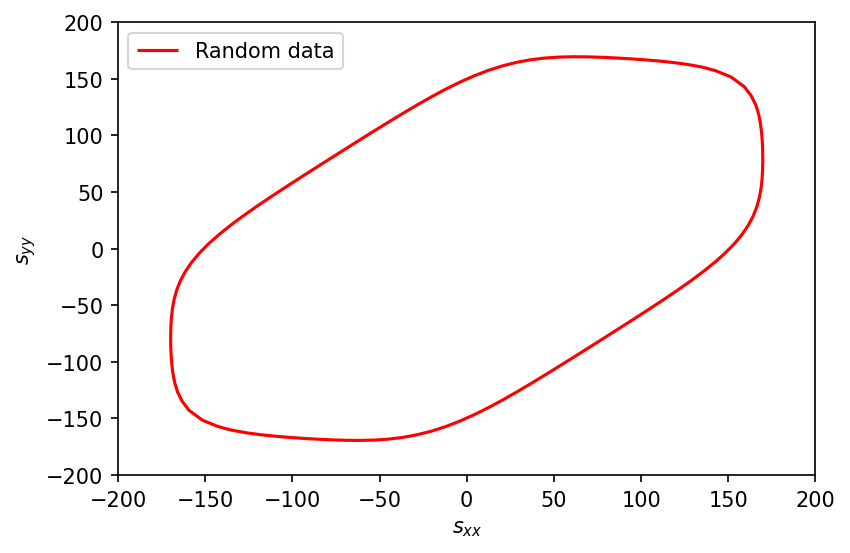

In [4]:
def z_of_contour(ax, xmesh, ymesh, alpha, a, points, colors, ys, levels=[1], linestyles=None):
    z = []
    for i in range(points):
        temp = []
        for j in range(points):
            temp.append(yld2000(xmesh[i,j], ymesh[i,j], alpha, a))
        z.append(temp)
    z = np.array(z)

    ax.contour(xmesh, ymesh, z-ys, levels=levels, colors=colors, linestyles=linestyles)

# alpha = np.array([1,1,1,1,1,1,1,1])
alpha = np.array([1.0021, 1.0849, 1.1022, 0.9761, 0.9681, 0.9770, 1.0482, 0.9618])
phi = np.linspace(0, 2 * np.pi, 100)
sxx_sample = np.linspace(-200,200,50)
syy_sample = np.linspace(-200,200,50)
sx_sample, sy_sample = np.meshgrid(sxx_sample, syy_sample)
ys = 150
a = 8


fig , ax = plt.subplots(1,1)
fig.set_dpi(150)

# The below section is to plot perpendicular lines passing through origin and each parallel to x and y-axis.

# --------------------------------------- #

# random_x = np.linspace(-200,200,len(sxx_sample))
# random_z = np.linspace(-200,200,len(sxx_sample))
# xx, zz = np.meshgrid(random_x, random_z)
# ax.contour(xx, np.zeros(len(sxx_sample)**2).reshape(xx.shape), zz, levels=[1], colors='yellow')

# random_y = np.linspace(-200,200,len(sxx_sample))
# yy, zz = np.meshgrid(random_y, random_z)
# ax.contour(np.zeros(len(sxx_sample)**2).reshape(xx.shape), yy, zz, levels=[1], colors='orange')

# --------------------------------------- #


z_of_contour(ax, sx_sample, sy_sample, alpha, a, len(sxx_sample), 'red', ys)

# Uncomment the lines below only if you have data from crystal plasticity model.
# If you don't, let it be. The script is self-sufficient.

# ax.scatter(sxx, syy)

_ = ax.set_xlabel('$s_{xx}$')
_ = ax.set_ylabel('$s_{yy}$')

# If you have the crystal plasticity data, please modify labels as:
# labels = ['Random data', 'Crystal plasticity data']
labels = ['Random data']
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])

_ = ax.legend(loc='upper left')

## Graphical signifcance of anistropic parameters

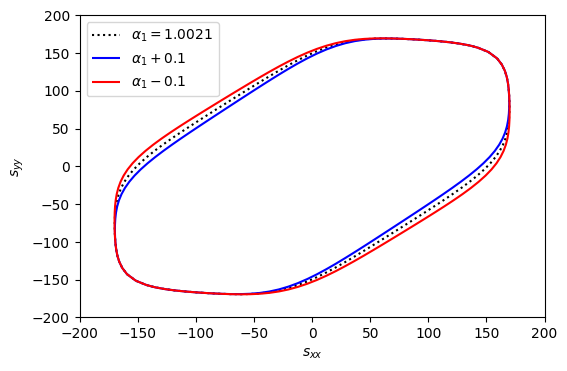

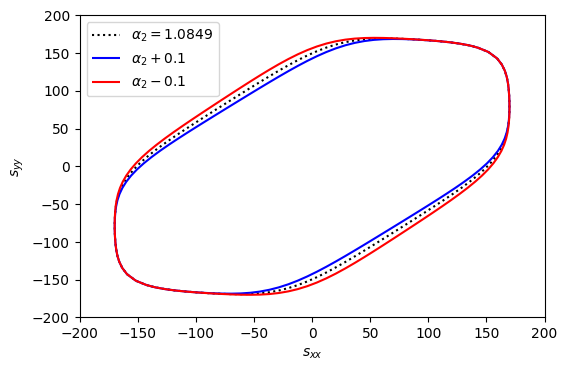

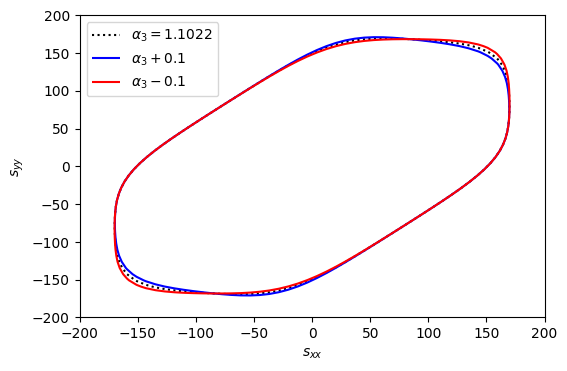

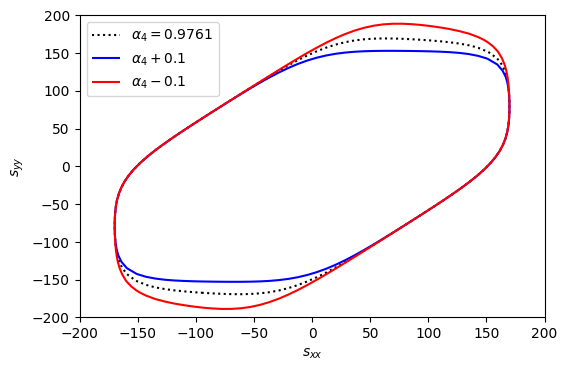

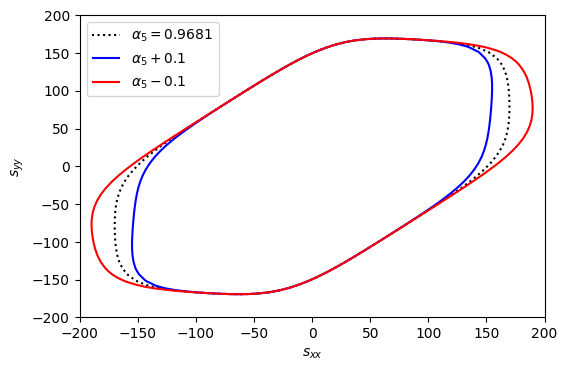

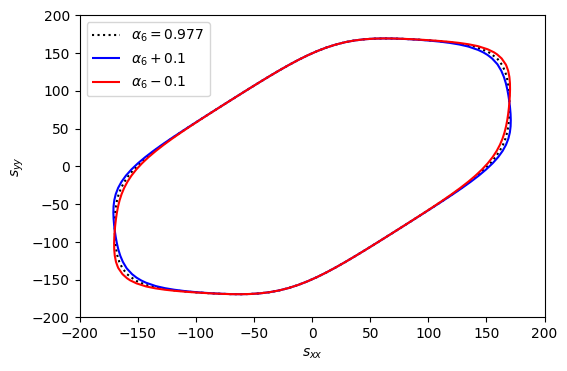

In [5]:
for i in range(6):
    delta = 0.1
    alpha_inc = []
    alpha_dec = []
    for j in range(len(alpha)):
        if i==j:
            alpha_inc.append(alpha[j]+delta)
            alpha_dec.append(alpha[j]-delta)
        else:
            alpha_inc.append(alpha[j])
            alpha_dec.append(alpha[j])

    fig , ax = plt.subplots(1,1)
    fig.set_dpi(100)

    z_of_contour(ax, sx_sample, sy_sample, alpha, a, len(sxx_sample), 'black', ys, linestyles='dotted')
    z_of_contour(ax, sx_sample, sy_sample, alpha_inc, a, len(sxx_sample), 'blue', ys)
    z_of_contour(ax, sx_sample, sy_sample, alpha_dec, a, len(sxx_sample), 'red', ys)
    ax.set_xlabel('$s_{xx}$')
    ax.set_ylabel('$s_{yy}$')
    labels = [f'$\\alpha_{i+1} = {alpha[i]}$', f'$\\alpha_{i+1}+{delta}$', f'$\\alpha_{i+1}-{delta}$']

    for j in range(len(labels)):
        ax.collections[j].set_label(labels[j])
    ax.legend(loc='upper left')

## Calculation of anisotropic parameters

Reference: Hamzah Abdulrahman Alharthi, *Accurate descriptions of the anisotropic plastic yielding behaviour of various metallic sheets*, Chapter 3 Page 31, Equation 3.16 

$$ F_{1} = \left\lvert{\alpha_{1} \frac{2}{3} - \alpha_{2} \left(\frac{-1}{3}\right)}\right \rvert^a  + \left\lvert{\alpha_{3} \frac{2}{3} + 2\alpha_{4} \left(\frac{-1}{3}\right)}\right \rvert^a + \left\lvert{2\alpha_{5} \frac{2}{3} + \alpha_{6} \left(\frac{-1}{3}\right)}\right \rvert^a - 2\left(\frac{\overline{\sigma}}{\sigma_{0}}\right)^a = 0 \tag{1} $$

$$ F_{2} = \left\lvert{\alpha_{1} \frac{-1}{3} - \alpha_{2} \left(\frac{2}{3}\right)}\right \rvert^a  + \left\lvert{\alpha_{3} \frac{-1}{3} + 2\alpha_{4} \left(\frac{2}{3}\right)}\right \rvert^a + \left\lvert{2\alpha_{5} \frac{-1}{3} + \alpha_{6} \left(\frac{2}{3}\right)}\right \rvert^a - 2\left(\frac{\overline{\sigma}}{\sigma_{90}}\right)^a = 0 \tag{2} $$

$$ F_{3} = \left\lvert{\alpha_{1} \frac{-1}{3} - \alpha_{2} \left(\frac{-1}{3}\right)}\right \rvert^a  + \left\lvert{\alpha_{3} \frac{-1}{3} + 2\alpha_{4} \left(\frac{-1}{3}\right)}\right \rvert^a + \left\lvert{2\alpha_{5} \frac{-1}{3} + \alpha_{6} \left(\frac{-1}{3}\right)}\right \rvert^a - 2\left(\frac{\overline{\sigma}}{\sigma_{b}}\right)^a = 0 \tag{3} $$

$$ G_{1} = \left(\alpha_{1}(1-R_{0}) + \alpha_{2}(2+R_{0})\right)\left(\alpha_{1} \frac{2}{3} - \alpha_{2} \left(\frac{-1}{3}\right)\right)\left\lvert{\alpha_{1} \frac{2}{3} - \alpha_{2} \left(\frac{-1}{3}\right)}\right \rvert^{a-2} +
\left(\alpha_{3}(1-R_{0}) - 2\alpha_{4}(2+R_{0})\right)\left(\alpha_{3} \frac{2}{3} + 2\alpha_{4} \left(\frac{-1}{3}\right)\right)\left\lvert{\alpha_{3} \frac{2}{3} + 2\alpha_{4} \left(\frac{-1}{3}\right)}\right \rvert^{a-2} +
\left(2\alpha_{5}(1-R_{0}) - \alpha_{6}(2+R_{0})\right)\left(2\alpha_{5} \frac{2}{3} + \alpha_{6} \left(\frac{-1}{3}\right)\right)\left\lvert{2\alpha_{5} \frac{2}{3} + \alpha_{6} \left(\frac{-1}{3}\right)}\right \rvert^{a-2} = 0 \tag{4} $$

$$ G_{2} = \left(\alpha_{1}(2+R_{90}) + \alpha_{2}(1-R_{90})\right)\left(\alpha_{1} \frac{-1}{3} - \alpha_{2} \left(\frac{2}{3}\right)\right)\left\lvert{\alpha_{1} \frac{-1}{3} - \alpha_{2} \left(\frac{2}{3}\right)}\right \rvert^{a-2} +
\left(\alpha_{3}(2+R_{90}) - 2\alpha_{4}(1-R_{90})\right)\left(\alpha_{3} \frac{-1}{3} + 2\alpha_{4} \left(\frac{2}{3}\right)\right)\left\lvert{\alpha_{3} \frac{-1}{3} + 2\alpha_{4} \left(\frac{2}{3}\right)}\right \rvert^{a-2} +
\left(2\alpha_{5}(2+R_{90}) - \alpha_{6}(1-R_{90})\right)\left(2\alpha_{5} \frac{-1}{3} + \alpha_{6} \left(\frac{2}{3}\right)\right)\left\lvert{2\alpha_{5} \frac{-1}{3} + \alpha_{6} \left(\frac{2}{3}\right)}\right \rvert^{a-2} = 0 \tag{5} $$

$$ G_{3} = \left(\alpha_{1}(1+2R_{b}) + \alpha_{2}(2+R_{b})\right)\left(\alpha_{1} \frac{-1}{3} - \alpha_{2} \left(\frac{-1}{3}\right)\right)\left\lvert{\alpha_{1} \frac{-1}{3} - \alpha_{2} \left(\frac{-1}{3}\right)}\right \rvert^{a-2} +
\left(\alpha_{3}(1+2R_{b}) - 2\alpha_{4}(2+R_{b})\right)\left(\alpha_{3} \frac{-1}{3} + 2\alpha_{4} \left(\frac{-1}{3}\right)\right)\left\lvert{\alpha_{3} \frac{-1}{3} + 2\alpha_{4} \left(\frac{-1}{3}\right)}\right \rvert^{a-2} +
\left(2\alpha_{5}(1+2R_{b}) - \alpha_{6}(2+R_{b})\right)\left(2\alpha_{5} \frac{-1}{3} + \alpha_{6} \left(\frac{-1}{3}\right)\right)\left\lvert{2\alpha_{5} \frac{-1}{3} + \alpha_{6} \left(\frac{-1}{3}\right)}\right \rvert^{a-2} = 0 \tag{6} $$

## Calculation of anistropic parameters

The data for r-values and strength ratio has been taken from - *Necking and fracture limit analyses of different pre-strained sheet materials*. Basak, Shamik and Panda, Kumar Sushanta. 267, 2019, Journal of Materials Processing Tech., pp. 298.

In [6]:
r0 = 1.21
r90 = 1.30
rb = 1.05

sigma0 = 1
sigma90 = 0.984
sigmab = 1.016

parameters = {
    1: {
        'strength_ratio': sigma0,
        'gamma': 2/3,
        'delta': -1/3,
        'p': 1-r0,
        'q': 2+r0,
    },
    2: {
        'strength_ratio': sigma90,
        'gamma': -1/3,
        'delta': 2/3,
        'p': 2+r90,
        'q': 1-r90,
    },
    3: {
        'strength_ratio': sigmab,
        'gamma': -1/3,
        'delta': -1/3,
        'p': 1+2*rb,
        'q': 2+rb,
    },
}

def F(gamma_j, delta_j, sigma_bar_sigma_j, alpha, a):
    alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = alpha
    x1 = abs(alpha1 * gamma_j - alpha2 * delta_j)**a
    x2 = abs(alpha3 * gamma_j + 2*alpha4 * delta_j)**a
    x3 = abs(2*alpha5 * gamma_j + alpha6 * delta_j)**a
    return x1 + x2 + x3 - 2*(sigma_bar_sigma_j)**a

def G(pj, qj, gamma_j, delta_j, alpha, a):
    alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = alpha
    x1 = (pj*alpha1 + qj*alpha2)*abs(alpha1 * gamma_j - alpha2 * delta_j)**(a-1)*np.sign(alpha1 * gamma_j - alpha2 * delta_j)
    x2 = (pj*alpha3 - 2*qj*alpha4)*abs(alpha3 * gamma_j + 2*alpha4 * delta_j)**(a-1)*np.sign(alpha3 * gamma_j + 2*alpha4 * delta_j)
    x3 = (2*pj*alpha5 - qj*alpha6)*abs(2*alpha5 * gamma_j + alpha6 * delta_j)**(a-1)*np.sign(2*alpha5 * gamma_j + alpha6 * delta_j)
    return x1 + x2 + x3

a = 6

def func(alpha):
    yield_strength_eqs = [F(parameters[i]['gamma'], parameters[i]['delta'], parameters[i]['strength_ratio'], alpha, a) for i in parameters]
    r_eqs = [G(parameters[i]['p'], parameters[i]['q'], parameters[i]['gamma'], parameters[i]['delta'], alpha, a) for i in parameters]
    return yield_strength_eqs + r_eqs
    
result = optimize.root(func, [1,1,1,1,1,1], method='hybr')
alpha = result.x
alpha = map(lambda parameter: "{:.4f}".format(parameter), alpha)
print(f'alpha: {list(alpha)}')

alpha: ['1.0248', '1.0076', '1.1124', '0.9902', '0.9894', '1.0208']
